<a href="https://colab.research.google.com/github/marzier/CSC481/blob/main/nicholas_ramirez_HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Select a function to optimize:
1. Rastrigin
2. Sphere
3. Ackley
4. Rosenbrock
5. Griewank
Enter your choice (1-5): 1


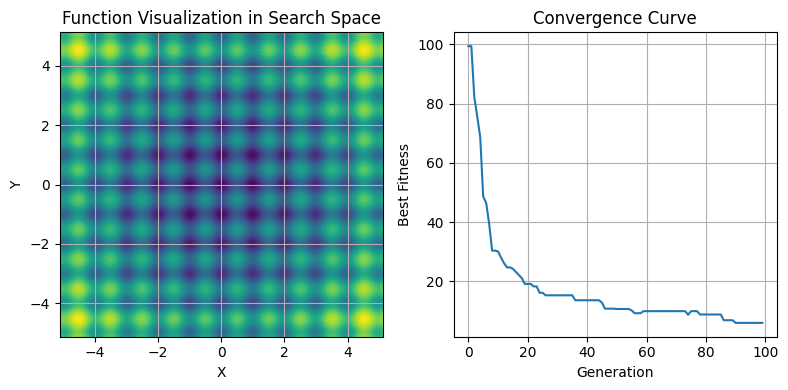

Best solution found: [ 1.05754497  0.01172006  0.9600671  -0.0102206   0.0120844   0.02267102
  0.94800273 -0.97583599 -0.03017296 -0.02413844]


In [1]:
# Import the necessary libraries for plotting
import matplotlib.pyplot as plt
import numpy as np
import random

# Optimization Functions
def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

def sphere_function(x):
    return sum([xi**2 for xi in x])

def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    n = len(x)
    sum1 = sum([xi**2 for xi in x])
    sum2 = sum([np.cos(c * xi) for xi in x])
    term1 = -a * np.exp(-b * np.sqrt(sum1 / n))
    term2 = -np.exp(sum2 / n)
    return term1 + term2 + a + np.exp(1)

def rosenbrock(x):
    return sum([100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x) - 1)])

def griewank(x):
    sum_part = sum([xi**2 / 4000 for xi in x])
    prod_part = np.prod([np.cos(xi / np.sqrt(i + 1)) for i, xi in enumerate(x)])
    return sum_part - prod_part + 1

# Menu to select the function to optimize
def select_function():
    print("Select a function to optimize:")
    print("1. Rastrigin")
    print("2. Sphere")
    print("3. Ackley")
    print("4. Rosenbrock")
    print("5. Griewank")
    choice = int(input("Enter your choice (1-5): "))

    if choice == 1:
        return rastrigin
    elif choice == 2:
        return sphere_function
    elif choice == 3:
        return ackley
    elif choice == 4:
        return rosenbrock
    elif choice == 5:
        return griewank
    else:
        print("Invalid choice. Defaulting to Rastrigin.")
        return rastrigin

# GA Parameters
population_size = 100
genome_length = 10
crossover_rate = 0.6 # .6 - .8
mutation_rate = 0.01 # always small
num_generations = 100
bounds = [-5.12, 5.12]

# Initialization
def initialize_population(pop_size, genome_len, bounds):
    return [np.random.uniform(bounds[0], bounds[1], genome_len) for _ in range(pop_size)]

# Fitness function
def evaluate_fitness(population, fitness_function):
    return [fitness_function(individual) for individual in population]

# Selection (Tournament Selection)
def tournament_selection(population, fitness, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        aspirants = [random.randint(0, len(population) - 1) for _ in range(tournament_size)]
        selected.append(min(aspirants, key=lambda aspirant: fitness[aspirant]))
    return [population[i] for i in selected]

# Crossover (Single Point Crossover)
def single_point_crossover(parent1, parent2):
    if random.random() < crossover_rate:
        point = random.randint(1, len(parent1) - 1)
        child1 = np.concatenate([parent1[:point], parent2[point:]])
        child2 = np.concatenate([parent2[:point], parent1[point:]])
        return child1, child2
    return parent1, parent2

# Mutation
def mutate(individual, mutation_rate, bounds):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = np.random.uniform(bounds[0], bounds[1])
    return individual

# Function to visualize the function in the search space
def visualize_function(fitness_function):
    x = np.linspace(bounds[0], bounds[1], 400)
    y = np.linspace(bounds[0], bounds[1], 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[fitness_function([xi, yi]) for xi, yi in zip(xrow, yrow)] for xrow, yrow in zip(X, Y)])
    return X, Y, Z

# Genetic Algorithm
def genetic_algorithm(fitness_function):
    # Initialize the population
    population = initialize_population(population_size, genome_length, bounds)

    # List to store the best fitness at each generation for plotting
    best_fitness_over_time = []

    # Iterate over the number of generations
    for generation in range(num_generations):
        # Evaluate the fitness of the population
        fitness = evaluate_fitness(population, fitness_function)

        # Selection
        selected_population = tournament_selection(population, fitness)

        # Crossover
        next_population = []
        for i in range(0, len(selected_population), 2):
            parent1 = selected_population[i]
            parent2 = selected_population[min(i + 1, len(selected_population) - 1)]
            child1, child2 = single_point_crossover(parent1, parent2)
            next_population.extend([child1, child2])

        # Mutation
        population = [mutate(individual, mutation_rate, bounds) for individual in next_population]

        # Evaluate the fitness of the new population
        fitness = evaluate_fitness(population, fitness_function)

        # Find the best fitness and individual
        best_fitness = min(fitness)
        best_individual = population[fitness.index(best_fitness)]

        # Append the best fitness to the list
        best_fitness_over_time.append(best_fitness)

    # Visualization for function in the search space
    X, Y, Z = visualize_function(fitness_function)

    # Create a subplot for visualization
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    # First subplot: Function characteristic in the search space
    ax[0].contourf(X, Y, Z, levels=50, cmap='viridis')
    ax[0].set_title('Function Visualization in Search Space')
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('Y')
    ax[0].grid(True)

    # Second subplot: Convergence curve
    ax[1].plot(best_fitness_over_time)
    ax[1].set_title("Convergence Curve")
    ax[1].set_xlabel("Generation")
    ax[1].set_ylabel("Best Fitness")
    ax[1].grid(True)

    # Show the plots
    plt.tight_layout()
    plt.show()

    # Return the best individual found
    return best_individual

# Main Program
if __name__ == "__main__":
    # Select the function to optimize
    selected_function = select_function()

    # Run the genetic algorithm and print the best solution
    best_solution = genetic_algorithm(selected_function)
    print("Best solution found:", best_solution)
